### Assignment
The dataset contains the record of marks scored in exams (exam1 and exam2) by candidates appearing in two entrance tests and whether or not they got admitted to the university the previous year. Construct a logistic regression model that can predict if the student, based on their scores this year, can get admitted to the university.

#### 1.Import Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### 2.Load the Dataset

In [ ]:
df = pd.read_csv('admission_data.csv', names = ['Exam1','Exam2','Admitted'])

In [ ]:
df.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


#### 3.Visualize the Data

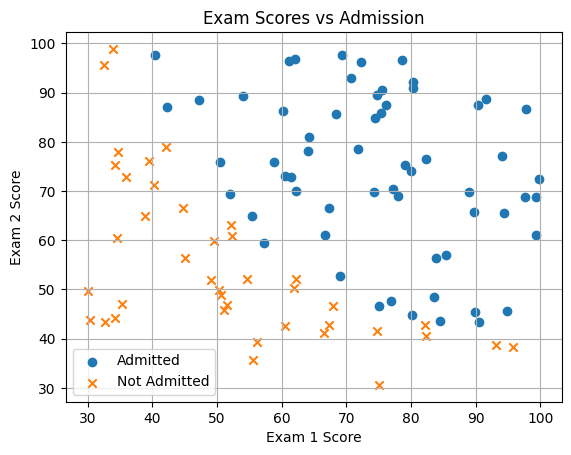

In [ ]:
admitted = df[df['Admitted'] == 1]
not_admitted = df[df['Admitted'] == 0]
plt.scatter(admitted['Exam1'], admitted['Exam2'], label='Admitted', marker='o')
plt.scatter(not_admitted['Exam1'], not_admitted['Exam2'], label='Not Admitted', marker='x')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()
plt.title('Exam Scores vs Admission')
plt.grid(True)
plt.show()

#### 4.Prepare Features and Labels

In [ ]:
X = df[['Exam1', 'Exam2']] # Features
y = df['Admitted']        # Labels

#### 5.Split Dataset into Training and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 6.Train Logistic Regression Model

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### 7.Make Predictions

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of being admitted

#### 8.Evaluate the Model

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.67      0.80        12

    accuracy                           0.80        20
   macro avg       0.83      0.83      0.80        20
weighted avg       0.87      0.80      0.80        20

Confusion Matrix:
 [[8 0]
 [4 8]]


#### 9.Predict New Student Admission

In [ ]:
new_student = np.array([[78, 85]])
predicted_class = model.predict(new_student)
admission_prob = model.predict_proba(new_student)[0][1]

print("Admitted (1=Yes, 0=No):", predicted_class[0])
print("Probability of Admission:", admission_prob)

Admitted (1=Yes, 0=No): 1
Probability of Admission: 0.9994908739138828


C:\Users\arpit\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\arpit\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
